In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string
import re

In [86]:
df= pd.read_csv('bestsellers with categories.csv')

In [87]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [88]:
df.shape

(550, 7)

# Data Preparation:
Now the next step is to prepare the data, here I will rename User Rating as user_rating, and then we will fix some spellings in the data:

In [89]:
df.rename(columns={'User Rating': 'User_Rating'},inplace=True)

In [90]:
df[df.Author == 'J. K. Rowling']

,Name,Author,User_Rating,Reviews,Price,Year,Genre
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction


In [91]:
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'

In [92]:
df['Name']

0                          10-Day Green Smoothie Cleanse
1                                      11/22/63: A Novel
2                12 Rules for Life: An Antidote to Chaos
3                                 1984 (Signet Classics)
4      5,000 Awesome Facts (About Everything!) (Natio...
                             ...                        
545         Wrecking Ball (Diary of a Wimpy Kid Book 14)
546    You Are a Badass: How to Stop Doubting Your Gr...
547    You Are a Badass: How to Stop Doubting Your Gr...
548    You Are a Badass: How to Stop Doubting Your Gr...
549    You Are a Badass: How to Stop Doubting Your Gr...
Name: Name, Length: 550, dtype: object

In [93]:
len(df['Name'].loc[0])

29

In [94]:
df['name_len']=df['Name'].apply(lambda x: len(x)- x.count(' '))   #subtract whitespces
df['name_len']

0      26
1      15
2      32
3      20
4      59
       ..
545    36
546    71
547    71
548    71
549    71
Name: name_len, Length: 550, dtype: int64

In [95]:
punctuations= string.punctuation
print('list of punctuations : ', punctuations)

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [96]:
# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

In [97]:
df['punc%']=df['Name'].apply(lambda x: count_punc(x))
df['punc%']

0       3.846
1      20.000
2       3.125
3      10.000
4      10.169
        ...  
545     5.556
546     1.408
547     1.408
548     1.408
549     1.408
Name: punc%, Length: 550, dtype: float64

In [98]:
no_dup =df.drop_duplicates('Name')
no_dup

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169
...,...,...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction,43,2.326
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction,50,2.000
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction,6,0.000
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,36,5.556


In [99]:
g_count =no_dup['Genre'].value_counts()
g_count.head()

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


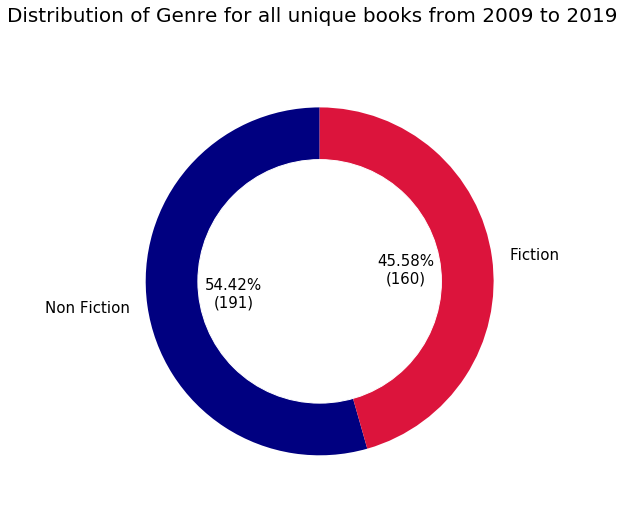

In [100]:
fig, ax =plt.subplots(figsize=(8,8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']


center_circle = plt.Circle((0,0),0.7,color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)

ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

#In the data set, Genre is a categorical dummy variable; Fiction and non-fiction. Non-fiction was a more popular category than fiction, each year from 2009 to 2019. Of the 351 unique books, 54.4% were non-fiction and 45.6% were fiction.

In [101]:
#Now, lets visualize the above insights according to each year

In [102]:
y1=np.arange(2009,2014)
y2=np.arange(2014,2020)

In [103]:
g_count= df['Genre'].value_counts()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


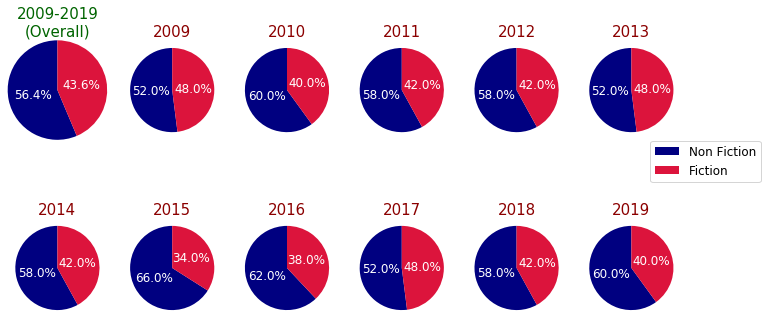

In [104]:
fig,ax = plt.subplots(2,6,figsize=(12,6))
ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',startangle=90, textprops={'size': 12, 'color': 'white'},pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009-2019\n(Overall)',color='darkgreen',fontdict={'fontsize':15})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

#plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             #fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

The highest fraction (66%) of non-fiction books were sold in 2015 and the lowest for fiction books. For fiction books, the 
highest fraction (48%) of books were sold in 2009, 2013 and 2017, and the lowest for non-fiction books.

The bestselling authors are selected based on their appearances in the top 50 bestselling books each year, from 2009 to 2019. Now let’s look at the top 10 bestselling authors of both fiction and non-fiction categories:

In [105]:
best_nf_authors= df.groupby(['Author','Genre']).agg({'Name': 'count'}).unstack()['Name','Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors=df.groupby(['Author','Genre']).agg({'Name': 'count'}).unstack()['Name','Fiction'].sort_values(ascending=False)[:11]


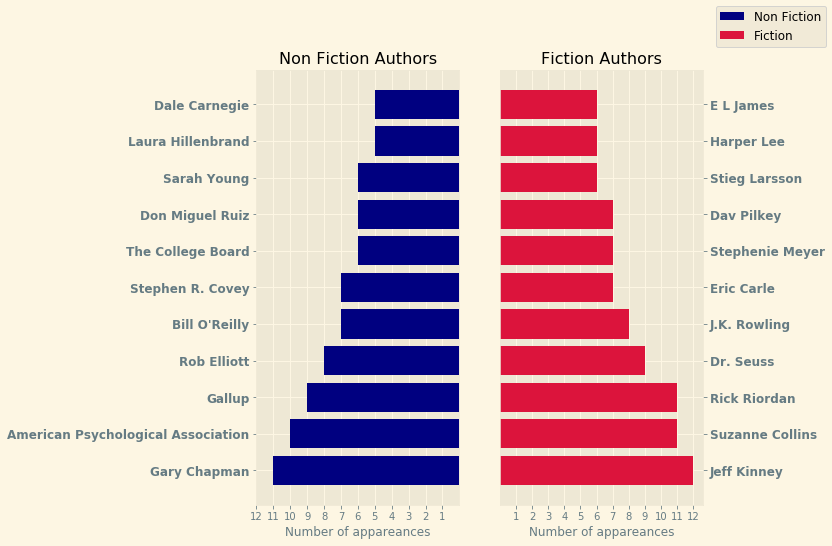

In [106]:
with plt.style.context('Solarize_Light2'):
    fig,ax =plt.subplots(1,2,figsize=(8,8))
    ax[0].barh(y=best_nf_authors.index,width=best_nf_authors.values,color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values))+1)
    ax[0].set_xlabel('Number of appareances')
    ax[0].set_yticklabels(best_nf_authors.index,fontsize=12,fontweight='semibold')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index,width=best_f_authors.values,color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values))+1)
    ax[1].set_xlabel('Number of appareances')
    ax[1].set_yticklabels(best_f_authors.index,fontsize=12,fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    
    fig.legend(['Non Fiction','Fiction'],fontsize=12)
plt.show()

Top-selling authors are selected based on their appearances in the top 50 best-selling books each year. The number of appearances includes duplicate book names. Their unique posts and overall reviews are featured below:

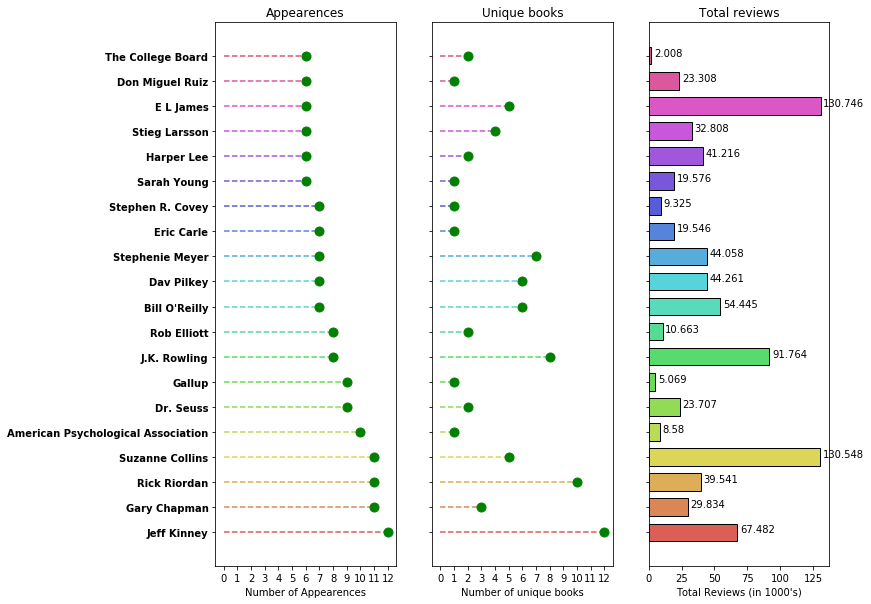

In [110]:
n_best=20

top_authors=df['Author'].value_counts().nlargest(n_best)
no_dup=df.drop_duplicates('Name') # Remove all rows with duplicate names

fig,ax = plt.subplots(1,3,figsize=(11,10),sharey=True)

color= sns.color_palette("hls",n_best)

ax[0].hlines(y=top_authors.index,xmin=0,xmax=top_authors.values,color=color,linestyles='dashed')
ax[0].plot(top_authors.values,top_authors.index,'go',markersize=9)
ax[0].set_xlabel('Number of Appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index,fontweight='semibold')
ax[0].set_title('Appearences')


book_count=[]
total_reviews=[]

for name,col in zip(top_authors.index,color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
    
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.show()

# Observation:
Author Jeff Kinney is the best-selling author with 12 appearances in best-selling books from 2009 to 2019.